In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import probplot
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv("CL.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_71,FEATURE_72,FEATURE_73,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100,FEATURE_101,FEATURE_102,FEATURE_103,FEATURE_104,FEATURE_105,FEATURE_106,FEATURE_107,FEATURE_108,FEATURE_109,FEATURE_110,FEATURE_111,FEATURE_112,FEATURE_113,FEATURE_114,FEATURE_115,FEATURE_116,FEATURE_117,FEATURE_118,FEATURE_119,FEATURE_120,FEATURE_121,FEATURE_122,FEATURE_123,FEATURE_124,FEATURE_125,FEATURE_126,FEATURE_127,FEATURE_128,FEATURE_129,FEATURE_130,FEATURE_131,FEATURE_132,FEATURE_133,FEATURE_134,FEATURE_135,FEATURE_136,FEATURE_137,FEATURE_138,FEATURE_139,FEATURE_140,FEATURE_141,FEATURE_142,FEATURE_143,FEATURE_144,FEATURE_145,FEATURE_146,FEATURE_147,FEATURE_148,FEATURE_149,FEATURE_150,FEATURE_151,FEATURE_152,FEATURE_153,FEATURE_154,FEATURE_155,FEATURE_156,FEATURE_157,FEATURE_158,FEATURE_159,FEATURE_160,FEATURE_161,FEATURE_162,FEATURE_163,FEATURE_164,FEATURE_165,FEATURE_166,FEATURE_167,FEATURE_168,FEATURE_169,FEATURE_170,FEATURE_171,FEATURE_172,FEATURE_173,FEATURE_174,FEATURE_175,FEATURE_176,FEATURE_177,FEATURE_178,FEATURE_179,FEATURE_180,FEATURE_181,FEATURE_182,FEATURE_183,FEATURE_184,FEATURE_185,FEATURE_186,FEATURE_187,FEATURE_188,FEATURE_189,FEATURE_190,FEATURE_191,FEATURE_192,FEATURE_193,FEATURE_194,FEATURE_195,FEATURE_196,FEATURE_197,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_203,FEATURE_204,FEATURE_205,FEATURE_206,FEATURE_207,FEATURE_208,FEATURE_209,FEATURE_210,FEATURE_211,FEATURE_212,FEATURE_213,FEATURE_214,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1053371037,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-114.527812,-17.218055,0.0,0.0,0.0,25.257841,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.492541,0.0,3.770712,-2.165145,0.0,-11.508692,0.0,0.0,0.0,0.0,0.0,0.0,0.709990,-166.128241,16.497987,-109.953267,-10.257451,-35.403966,0.0,0.0,0.0,0.0,0.0,0.0,10.689090,0.868280,79.319996,57.563879,5.147706,219.773565,13.723706,79.067758,12.855037,-22.713935,-13.550348,-31.575653,64.609721,111.118840,104.421868,93.389622,33.815437,27.072520,60.966939,279.433996,242.857149,342.448089,180.439710,157.383234,12.0,0.0,436.976097,393.719775,438.089670,5.0,0.0,1.225806,20.945718,100.423397,-14.418549,11.459275,49.192649,58.212399,103.175453,30.562678,0.022050,12.683430,1.009054,-1.828095,0.040347,-11.521372,30.630117,-3.772832,-13.410730,17.525901,-0.033100,0.151530,8.523431,41.071996,0.367572,-0.267070,0.288801,-0.523745,48.307264,0.648305,0.123284,0.430367,6.378862,41.714275,1.401470,0.000000,0.125000,2.407001,8.846116,0.375000,5.0,3.0,0.0,0.0,0.0,0.0

In [4]:
col_drop = []
col_bin = []
col_cat = []
col_cat10 = []
col_dec = []

for col in data.drop(['ID', 'TARGET'], axis=1).columns:
    length = len(data[col].unique())
    #print(col+' - {}'.format(len(data[col].unique())))
    if length == 1:
        col_drop.append(col)
    elif length == 2:
        col_bin.append(col)
    elif length < 11:
        col_cat10.append(col)
    elif length>10 and length<1000:
        col_cat.append(col)
    else:
        col_dec.append(col)

In [5]:
#plt.figure(figsize=(20, len(col_dec)*4))
#i = 0
#for col in col_dec:
#    i+=1
#    plt.subplot(len(col_dec), 4, i)
#    plt.hist(data[col].dropna(), bins=23)
#    plt.title(col, fontsize=14, y=1)
    
#    i+=1
#    plt.subplot(len(col_dec), 4, i)
#    plt.boxplot(data[col].dropna(), vert=False)
      
#    i+=1
#    plt.subplot(len(col_dec), 4, i)
#    probplot(data[col].dropna(), dist='norm', plot=plt)
    
#    i+=1
#    plt.subplot(len(col_dec), 4, i)
#    probplot(np.log(data[col].dropna()).dropna(), dist='norm', plot=plt)
    
#plt.show()

# OneHotEncoding - cat < 10

In [6]:
data_cat10 = data[col_cat10].fillna(999)

In [7]:
enc = OneHotEncoder()
data_cat10_enc = enc.fit_transform(data_cat10)

In [8]:
data_cat10_enc.shape

(24521, 145)

# 10 < cat < 1000
1. как есть
2. MinMax
3. StandardScaler

### Default

In [9]:
data_cat = data[col_cat]

### MinMax

In [10]:
MM_scaler = MinMaxScaler()
data_cat_MM_scale = MM_scaler.fit_transform(data_cat.fillna(data_cat.median()))

### StandardScaler

In [11]:
S_scaler = StandardScaler()
data_cat_St_scale = S_scaler.fit_transform(data_cat.fillna(data_cat.median()))

# Outliers detection - dec

In [12]:
col_out = ['FEATURE_82', 'FEATURE_98', 'FEATURE_108']

In [13]:
data_copy = data
col_extra = []

n_sigma = 4
col_dec2 = col_dec
col_dec2.remove('FEATURE_82')
col_dec2.remove('FEATURE_98')
col_dec2.remove('FEATURE_108')

for col in col_dec2:
    col_extra.append(col+'_extra')
    
    data_copy[col+'_extra'] = data[col]
    data_copy[col+'_extra'] = np.where(data_copy[col] > n_sigma *np.std(data_copy[col]), 1, 0) 
    data_copy[col+'_extra'] = np.where(data_copy[col] < -n_sigma *np.std(data_copy[col]),
                                       -1, data_copy[col+'_extra'])
    
    print(col, np.unique(data_copy[col+'_extra'], return_counts=True), 
          np.sum(data_copy[col+'_extra']!=0).astype(int)/len(data)*100)
    
    data_copy[col] = np.where(data_copy[col+'_extra']!=0, np.median(data_copy[col]), data_copy[col])

FEATURE_7 (array([0, 1]), array([24123,   398], dtype=int64)) 1.6230985685738755
FEATURE_8 (array([0, 1]), array([23974,   547], dtype=int64)) 2.2307409975123362
FEATURE_12 (array([0, 1]), array([24194,   327], dtype=int64)) 1.3335508339790385
FEATURE_21 (array([0, 1]), array([23907,   614], dtype=int64)) 2.503976183679295
FEATURE_23 (array([0, 1]), array([24409,   112], dtype=int64)) 0.4567513559805881
FEATURE_24 (array([0, 1]), array([24138,   383], dtype=int64)) 1.5619265119693324
FEATURE_26 (array([0, 1]), array([24419,   102], dtype=int64)) 0.41596998491089265
FEATURE_33 (array([0, 1]), array([24225,   296], dtype=int64)) 1.2071285836629828
FEATURE_34 (array([0, 1]), array([24218,   303], dtype=int64)) 1.2356755434117694
FEATURE_35 (array([0, 1]), array([24172,   349], dtype=int64)) 1.4232698503323682
FEATURE_36 (array([0, 1]), array([24189,   332], dtype=int64)) 1.353941519513886
FEATURE_37 (array([0, 1]), array([24158,   363], dtype=int64)) 1.4803637698299417
FEATURE_38 (array([

C:\Users\rogov\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


FEATURE_63 (array([0, 1]), array([24086,   435], dtype=int64)) 1.7739896415317484
FEATURE_64 (array([0, 1]), array([24094,   427], dtype=int64)) 1.741364544675992
FEATURE_65 (array([0, 1]), array([24070,   451], dtype=int64)) 1.8392398352432608
FEATURE_66 (array([0, 1]), array([24057,   464], dtype=int64)) 1.892255617633865
FEATURE_67 (array([0, 1]), array([24052,   469], dtype=int64)) 1.9126463031687124
FEATURE_68 (array([0, 1]), array([24066,   455], dtype=int64)) 1.855552383671139
FEATURE_71 (array([0, 1]), array([24100,   421], dtype=int64)) 1.7168957220341747
FEATURE_72 (array([0, 1]), array([24084,   437], dtype=int64)) 1.7821459157456876
FEATURE_73 (array([0, 1]), array([24090,   431], dtype=int64)) 1.7576770931038703
FEATURE_77 (array([0]), array([24521], dtype=int64)) 0.0
FEATURE_78 (array([0, 1]), array([24119,   402], dtype=int64)) 1.6394111170017538
FEATURE_79 (array([0, 1]), array([24091,   430], dtype=int64)) 1.7535989559969007
FEATURE_80 (array([0, 1]), array([24077,   4

In [16]:
data_dec_extra = data_copy[col_extra]

for col in col_extra:
    if len(data_dec_extra[col].unique()) == 1:
        data_dec_extra.drop(col, inplace=True, axis=1)

#for col in data_dec_extra.columns:
#    print(len(data_dec_extra[col].unique()))

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


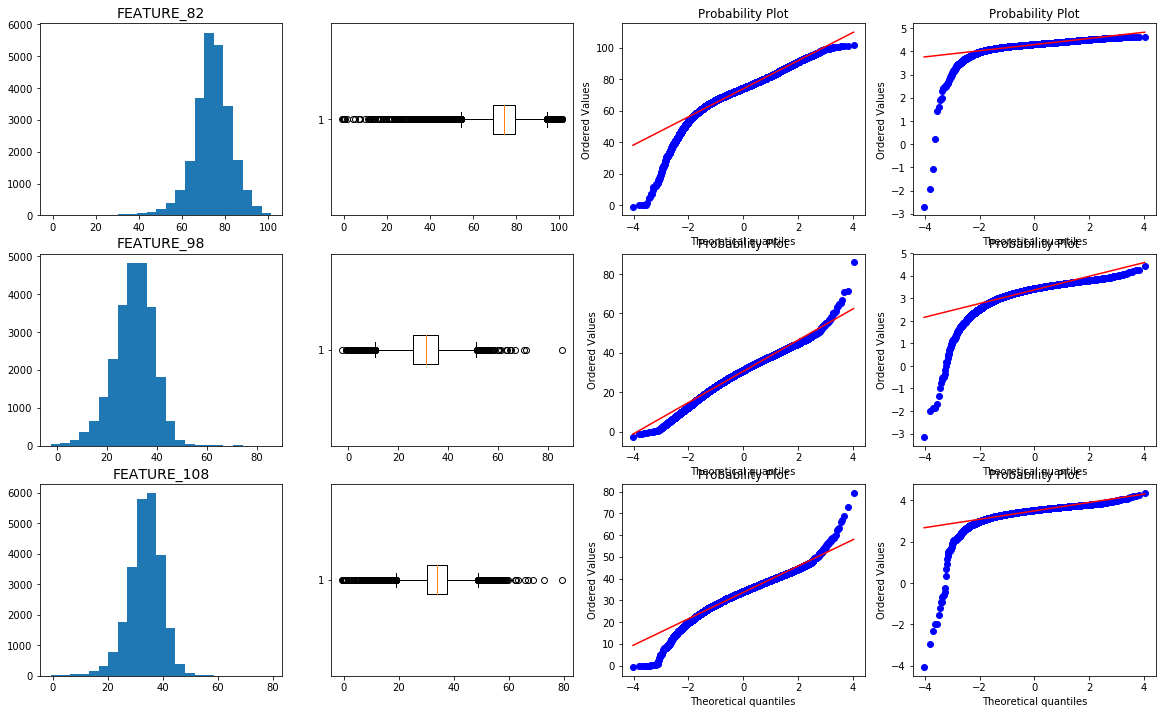

In [17]:
plt.figure(figsize=(20, len(col_out)*4))
i = 0
for col in col_out:
    i+=1
    plt.subplot(len(col_out), 4, i)
    plt.hist(data[col].dropna(), bins=23)
    plt.title(col, fontsize=14, y=1)
    
    i+=1
    plt.subplot(len(col_out), 4, i)
    plt.boxplot(data[col].dropna(), vert=False)
      
    i+=1
    plt.subplot(len(col_out), 4, i)
    probplot(data[col].dropna(), dist='norm', plot=plt)
    
    i+=1
    plt.subplot(len(col_out), 4, i)
    probplot(np.log(data[col].dropna()).dropna(), dist='norm', plot=plt)
    
plt.show()

### Outliers Log

In [18]:
for col in col_dec2:
    data_copy[col] = np.log(data_copy[col])
    data_copy[col] = data_copy[col].fillna(data_copy[col].median())

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


## Scale

### StandardScaler

In [19]:
S_scale2 = StandardScaler()
data_dec_St_scale = S_scale2.fit_transform(data_copy[col_dec])

### MinMaxScaler

In [20]:
MM_scale2 = MinMaxScaler()
data_dec_MM_scale = MM_scale2.fit_transform(data_copy[col_dec])

In [21]:
data_bin = data[col_bin]

# ЧТО В ИТОГЕ

Категориальные <10    **data_cat10_enc**


Категориальные 10< cat <1000
* Без изменений **data_cat**
* StandardScaler **data_cat_St_scale**
* MinMaxScaler **data_cat_MM_scale**


Остальные
* StandardScaler **data_dec_St_scale**
* MinMaxScaler **data_dec_MM_scale**


Новые фичи из выбросов **data_dec_extra**


Бинарные фичи из изначального датасета **data_bin**